<a href="https://colab.research.google.com/github/Niushamesgari/Deep-learning-project/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
#create a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df["target_name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

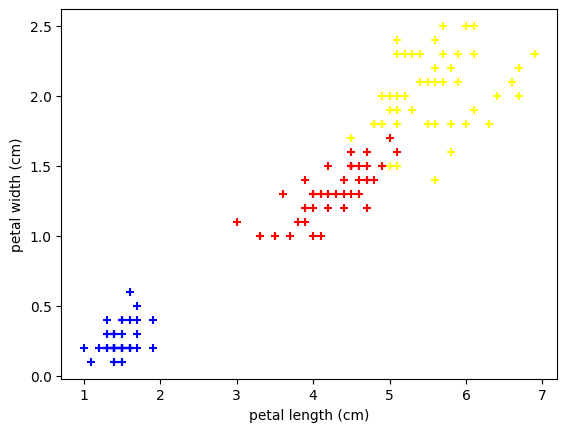

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0['petal length (cm)'],df0["petal width (cm)"],marker= "+",color= "blue")
plt.scatter(df1['petal length (cm)'],df1["petal width (cm)"],marker= "+",color= "red")
plt.scatter(df2['petal length (cm)'],df2["petal width (cm)"],marker= "+",color= "yellow")

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(["target","target_name"], axis = "columns")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train,y_train )

SVC()

In [ ]:
model.score(X_test,y_test)

0.9666666666666667

In [ ]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_predicted)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

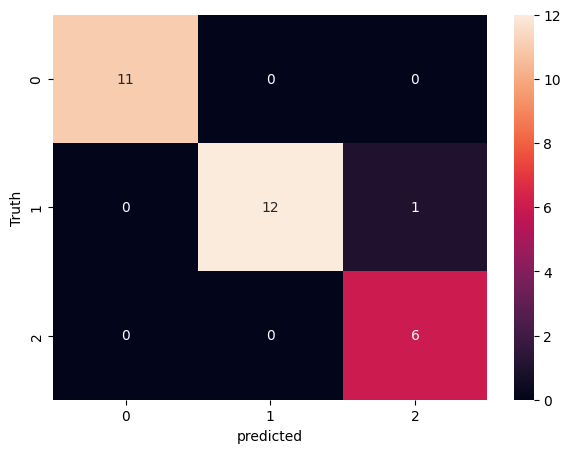

In [ ]:
#for better visualization
import seaborn as sn
plt.figure(figsize= (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")